In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Load Data

In [2]:
file_path = r'C:\Users\krish\Downloads\daily_weather (1).csv'
df = pd.read_csv(file_path)
print(f'Shape: {{df.shape}}')
df.head()


Shape: {df.shape}


,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


### Handle Missing Values

In [3]:
df['air_pressure_9am'].fillna(df['air_pressure_9am'].mean(), inplace=True)
df['air_temp_9am'].fillna(df['air_temp_9am'].mean(), inplace=True)
df['avg_wind_direction_9am'].fillna(df['avg_wind_direction_9am'].mean(), inplace=True)
df['max_wind_direction_9am'].fillna(df['max_wind_direction_9am'].mean(), inplace=True)
df['rain_accumulation_9am'].fillna(df['rain_accumulation_9am'].median(), inplace=True)
df['rain_duration_9am'].fillna(df['rain_duration_9am'].median(), inplace=True)
df['avg_wind_speed_9am'].fillna(df['avg_wind_speed_9am'].median(), inplace=True)
df['max_wind_speed_9am'].fillna(df['max_wind_speed_9am'].median(), inplace=True)


### Handle Outliers

In [4]:
# Remove Rows Outliers: rain_accumulation_9am
Q1 = df['rain_accumulation_9am'].quantile(0.25)
Q3 = df['rain_accumulation_9am'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['rain_accumulation_9am'] >= Q1-1.5*IQR) & (df['rain_accumulation_9am'] <= Q3+1.5*IQR)]
# Remove Rows Outliers: rain_duration_9am
Q1 = df['rain_duration_9am'].quantile(0.25)
Q3 = df['rain_duration_9am'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['rain_duration_9am'] >= Q1-1.5*IQR) & (df['rain_duration_9am'] <= Q3+1.5*IQR)]
# Cap Outliers: air_pressure_9am
Q1 = df['air_pressure_9am'].quantile(0.25)
Q3 = df['air_pressure_9am'].quantile(0.75)
IQR = Q3 - Q1
df['air_pressure_9am'] = df['air_pressure_9am'].clip(lower=Q1-1.5*IQR, upper=Q3+1.5*IQR)
# Cap Outliers: air_temp_9am
Q1 = df['air_temp_9am'].quantile(0.25)
Q3 = df['air_temp_9am'].quantile(0.75)
IQR = Q3 - Q1
df['air_temp_9am'] = df['air_temp_9am'].clip(lower=Q1-1.5*IQR, upper=Q3+1.5*IQR)
# Cap Outliers: avg_wind_speed_9am
Q1 = df['avg_wind_speed_9am'].quantile(0.25)
Q3 = df['avg_wind_speed_9am'].quantile(0.75)
IQR = Q3 - Q1
df['avg_wind_speed_9am'] = df['avg_wind_speed_9am'].clip(lower=Q1-1.5*IQR, upper=Q3+1.5*IQR)
# Cap Outliers: max_wind_speed_9am
Q1 = df['max_wind_speed_9am'].quantile(0.25)
Q3 = df['max_wind_speed_9am'].quantile(0.75)
IQR = Q3 - Q1
df['max_wind_speed_9am'] = df['max_wind_speed_9am'].clip(lower=Q1-1.5*IQR, upper=Q3+1.5*IQR)
# Cap Outliers: relative_humidity_9am
Q1 = df['relative_humidity_9am'].quantile(0.25)
Q3 = df['relative_humidity_9am'].quantile(0.75)
IQR = Q3 - Q1
df['relative_humidity_9am'] = df['relative_humidity_9am'].clip(lower=Q1-1.5*IQR, upper=Q3+1.5*IQR)


### Univariate Analysis

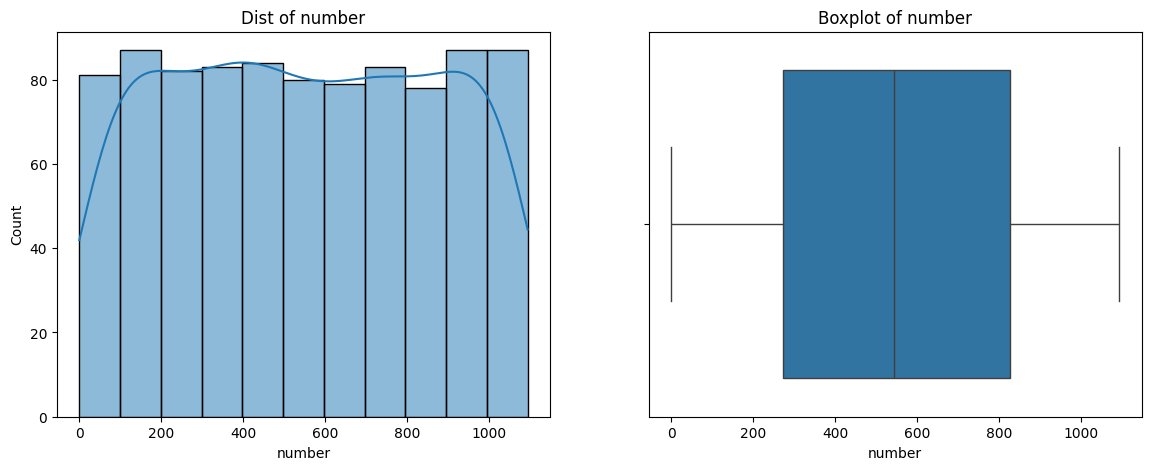

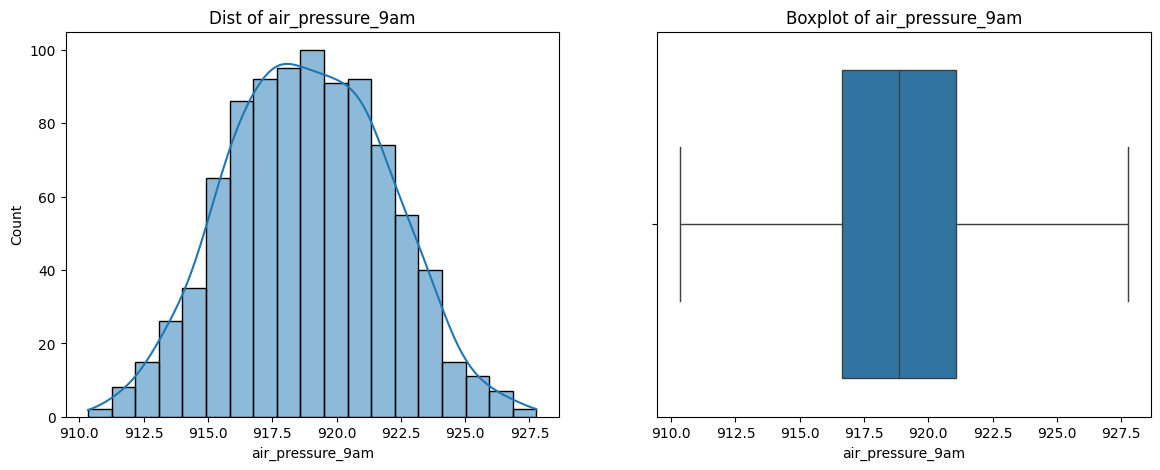

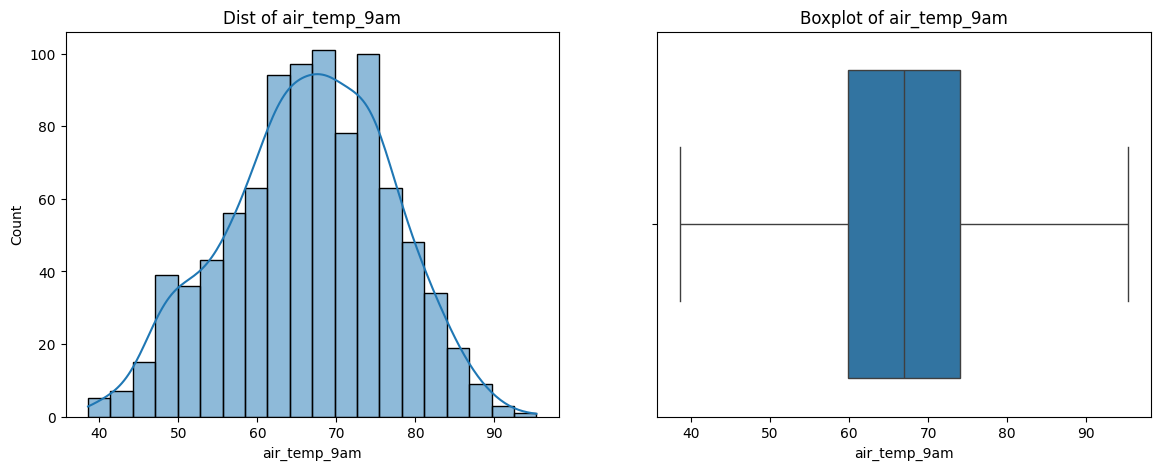

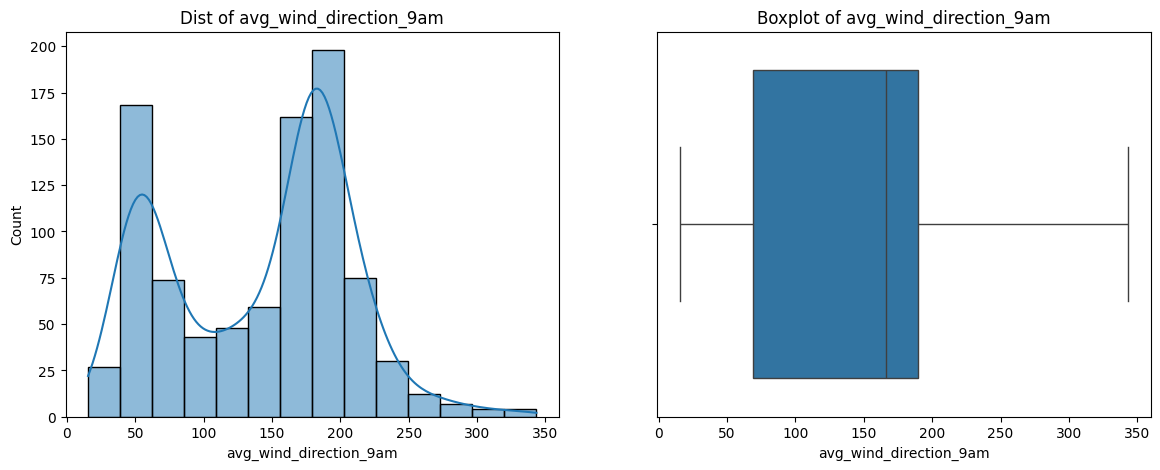

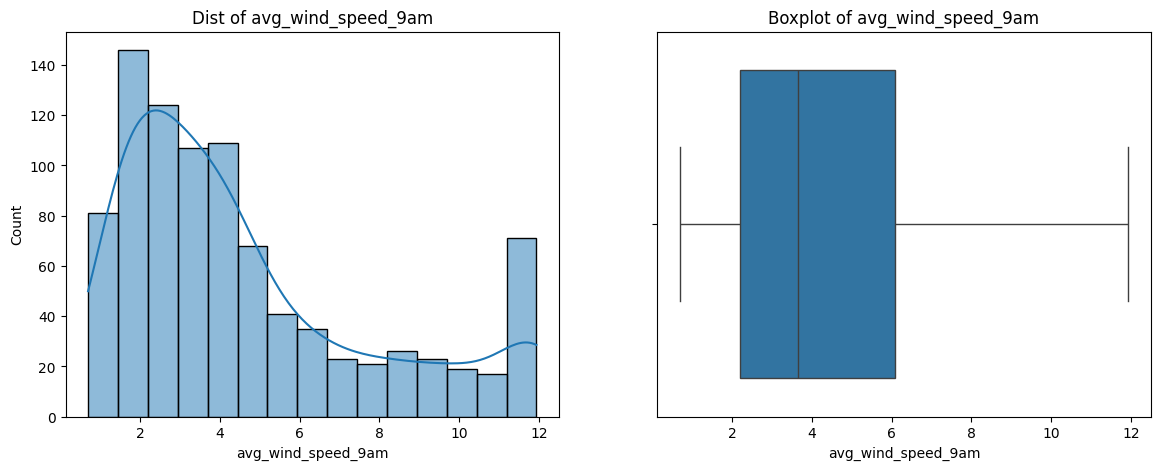

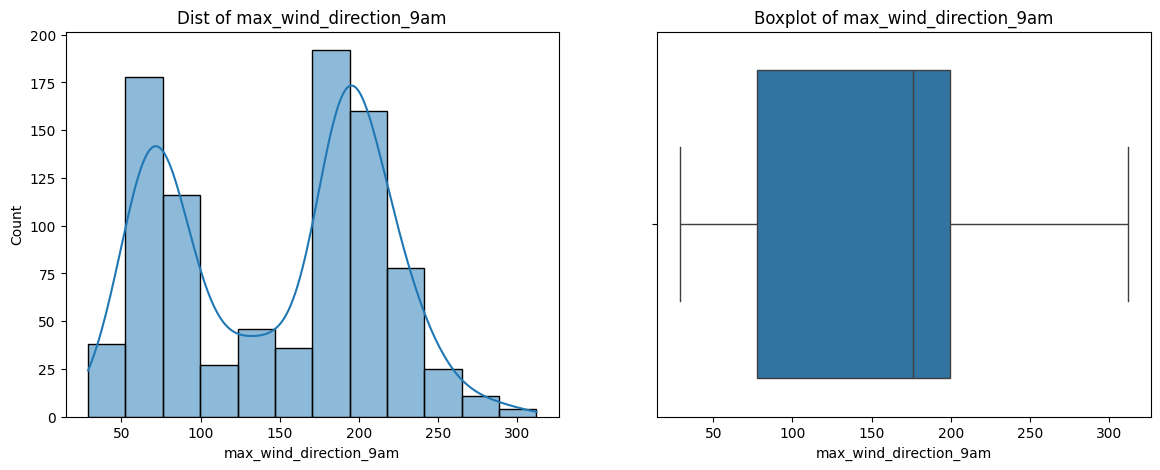

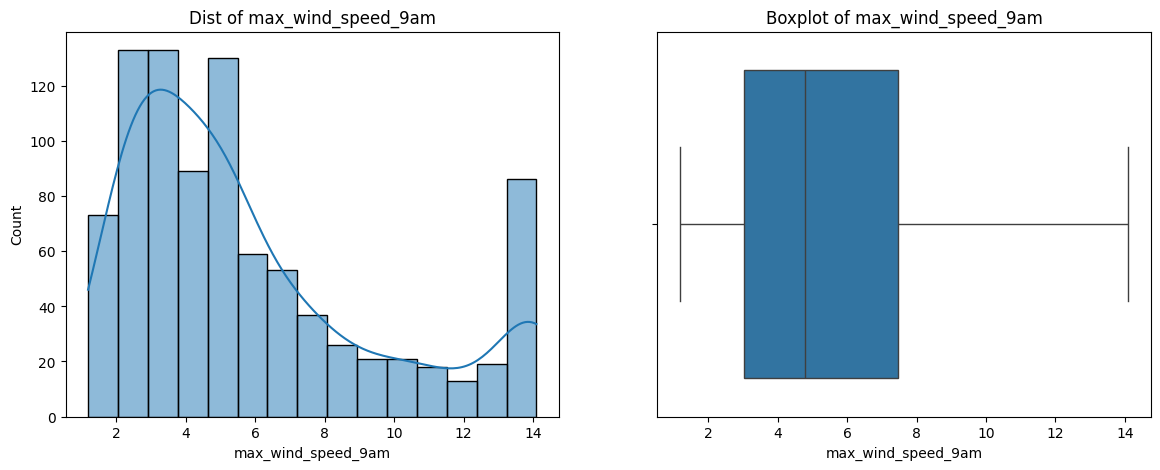

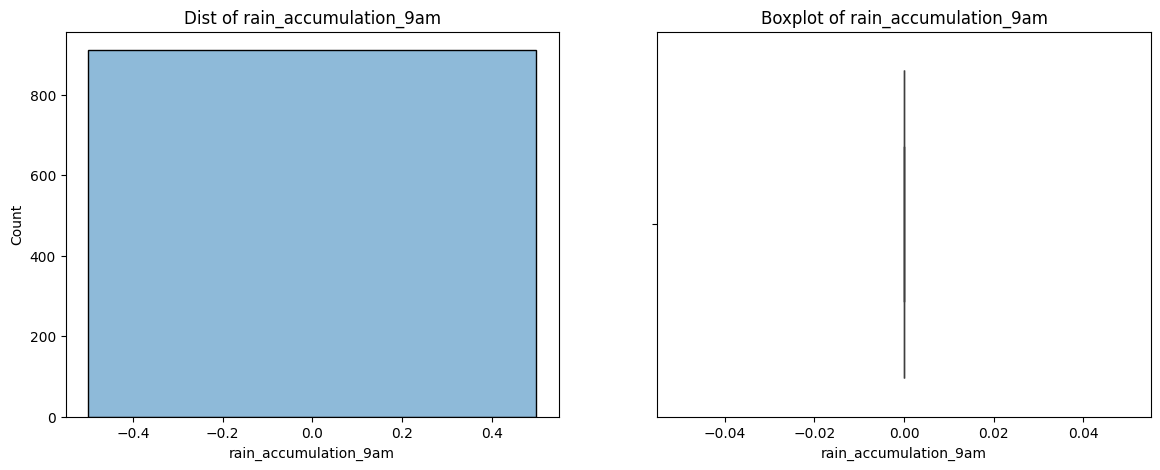

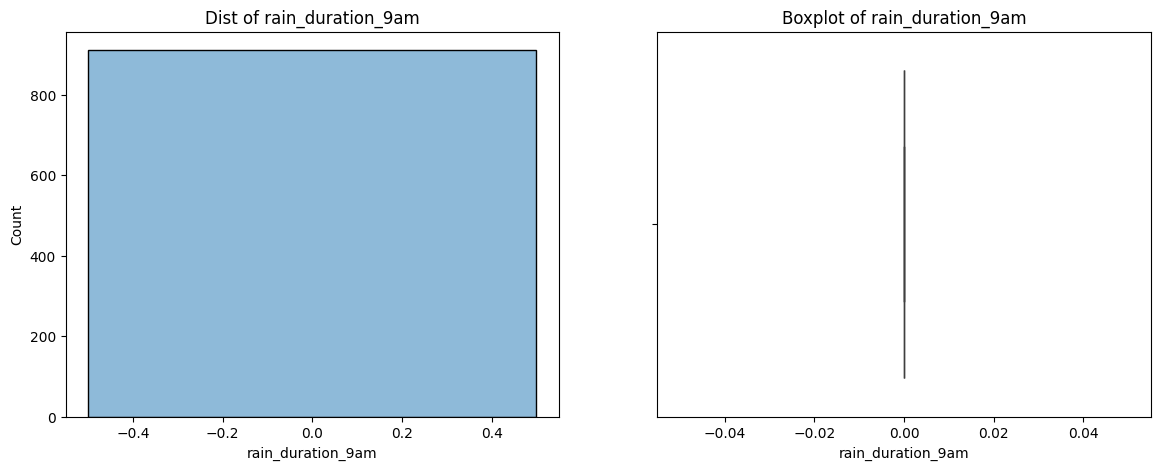

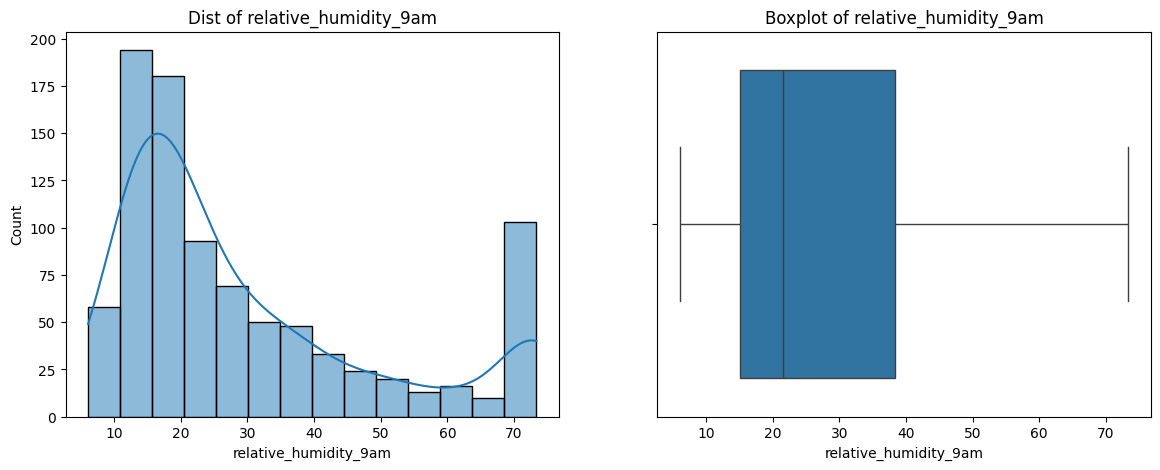

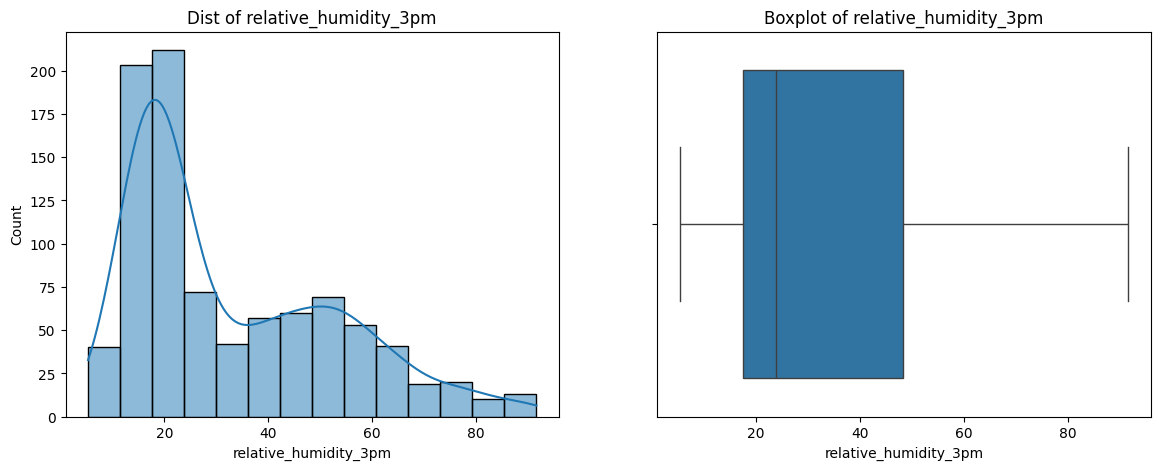

In [5]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(df[col], kde=True, ax=ax[0])
    ax[0].set_title(f'Dist of {col}')
    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f'Boxplot of {col}')
    plt.show()


### Bivariate Analysis

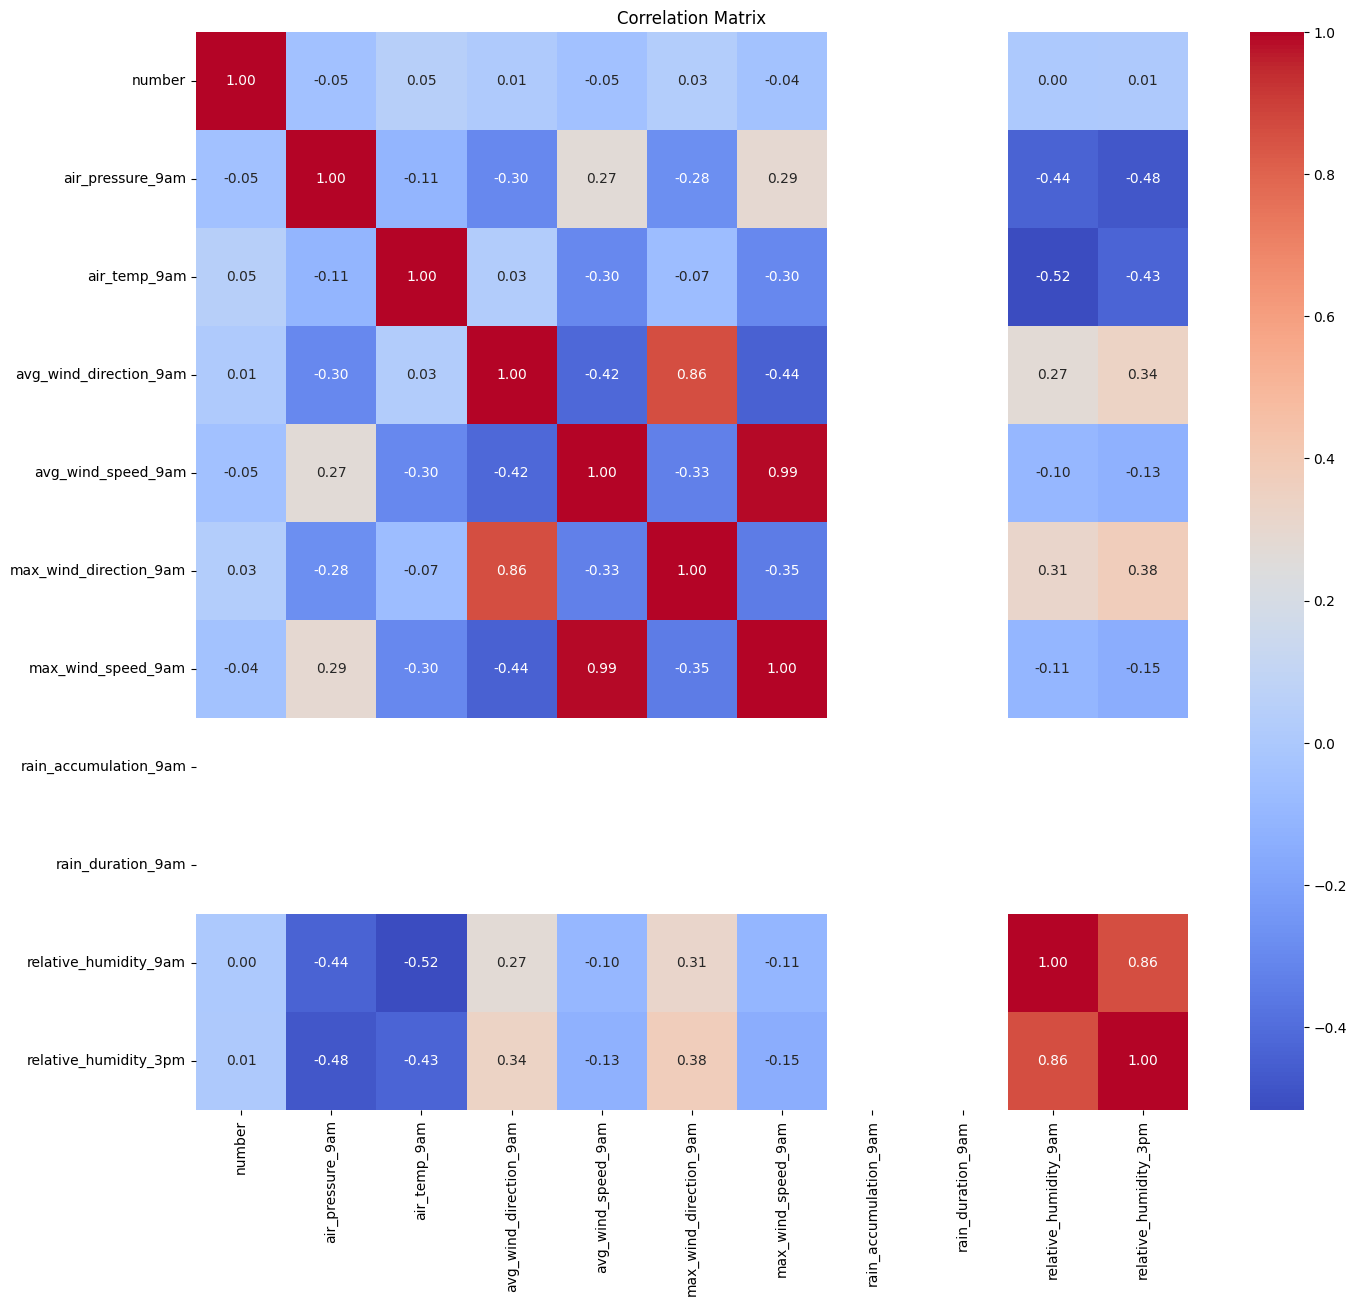

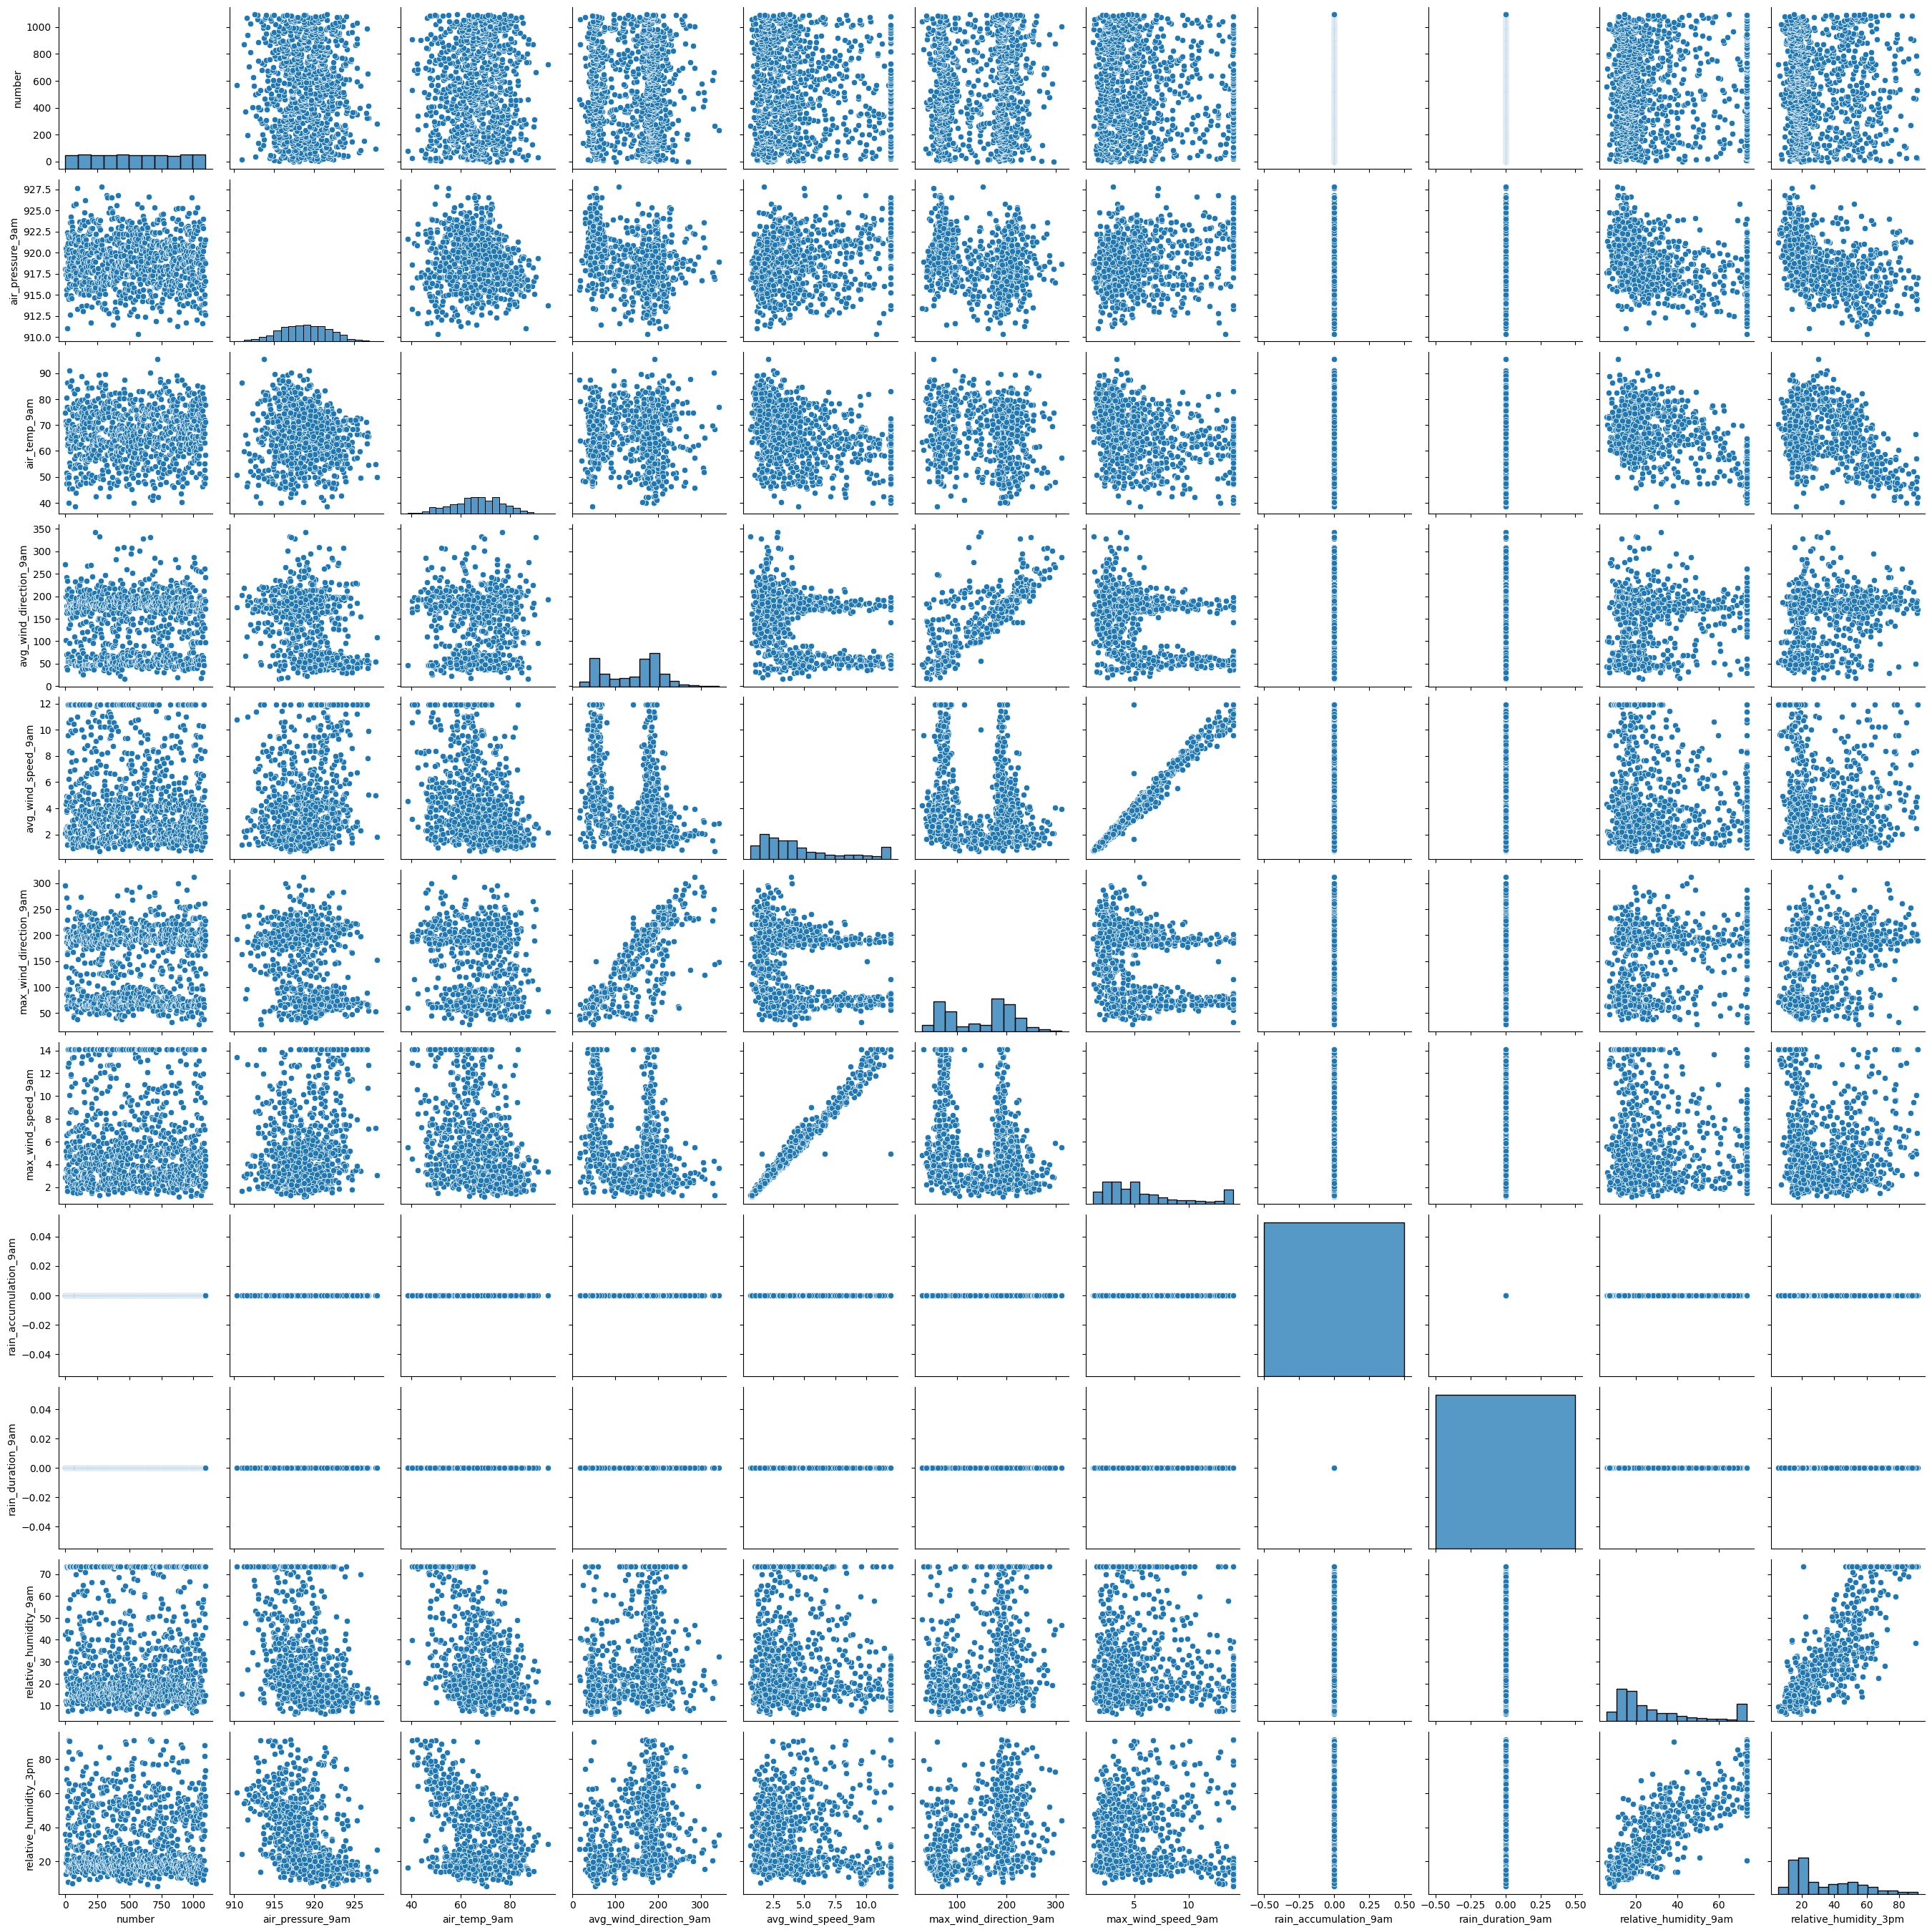

In [6]:
numeric_cols = df.select_dtypes(include=np.number).columns
# Correlation Heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(df[numeric_cols].corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(df[numeric_cols], hue='None' if 'None' != 'None' else None)
plt.show()


### Handle Multicollinearity

In [7]:
df.drop(columns=['max_wind_speed_9am'], inplace=True)


### Feature Scaling

In [8]:
scaler = StandardScaler()
df[['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am', 'max_wind_direction_9am', 'relative_humidity_3pm']] = scaler.fit_transform(df[['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am', 'max_wind_direction_9am', 'relative_humidity_3pm']])
scaler = MinMaxScaler()
df[['relative_humidity_9am', 'avg_wind_speed_9am']] = scaler.fit_transform(df[['relative_humidity_9am', 'avg_wind_speed_9am']])
